# Unsupervised Learning

## Projection Methods

### PCA

Explained in previous lessons

### UMAP

In [1]:
from sklearn.datasets import load_iris, load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

%matplotlib inline

In [2]:
digits = load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.images.shape

(1797, 8, 8)

/home/ubuntu/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


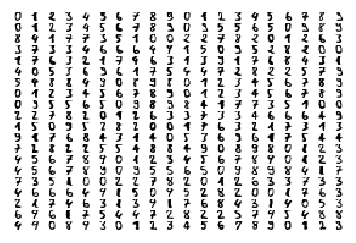

In [5]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [44]:
!pip install umap-learn

In [45]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [46]:
embedding = reducer.transform(digits.data)

embedding

array([[13.130022  ,  3.9631405 ],
       [-6.2700796 ,  3.031622  ],
       [-4.433785  ,  0.5644423 ],
       ...,
       [-3.8944273 ,  1.8646958 ],
       [-0.86116326, -3.3621562 ],
       [-3.4770098 ,  1.5070482 ]], dtype=float32)

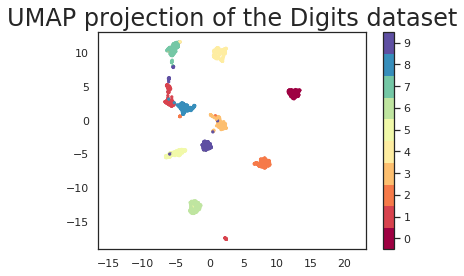

In [47]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

For more information about UMAP algorithm check the following posts: 
- https://pair-code.github.io/understanding-umap/
- https://umap-learn.readthedocs.io/en/latest/parameters.html

## Clustering Methods

### K-Means

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(digits.data)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [49]:
kmeans.predict(digits.data)

array([0, 5, 5, ..., 5, 1, 1], dtype=int32)

In [11]:
kmeans.cluster_centers_[0]

array([ 0.00000000e+00,  2.23463687e-02,  4.22905028e+00,  1.31396648e+01,
        1.12681564e+01,  2.93854749e+00,  3.35195531e-02, -2.77555756e-16,
       -2.51534904e-17,  8.82681564e-01,  1.26201117e+01,  1.33687151e+01,
        1.14078212e+01,  1.13687151e+01,  9.60893855e-01,  3.60822483e-16,
       -1.25767452e-17,  3.72625698e+00,  1.42122905e+01,  5.25139665e+00,
        2.10614525e+00,  1.21173184e+01,  3.53072626e+00,  5.55111512e-17,
       -2.81892565e-18,  5.29608939e+00,  1.26424581e+01,  2.03351955e+00,
        2.29050279e-01,  9.07821229e+00,  6.47486034e+00, -5.63785130e-18,
        0.00000000e+00,  5.88268156e+00,  1.14916201e+01,  8.65921788e-01,
        3.35195531e-02,  8.81005587e+00,  7.15083799e+00,  0.00000000e+00,
       -2.25514052e-17,  3.51396648e+00,  1.32849162e+01,  1.65921788e+00,
        1.49162011e+00,  1.13519553e+01,  5.84357542e+00, -2.08166817e-17,
       -2.42861287e-17,  8.04469274e-01,  1.31117318e+01,  9.96089385e+00,
        1.03519553e+01,  

In [55]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(embedding)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

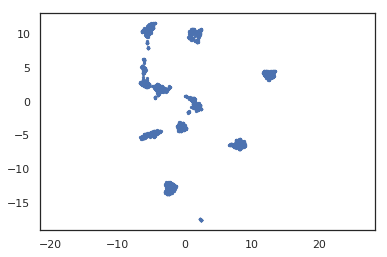

In [56]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar(boundaries=np.arange(kmeans.n_clusters)+0.5).set_ticks(np.arange(kmeans.n_clusters))
# plt.title('K-Means over the Digits dataset', fontsize=24);

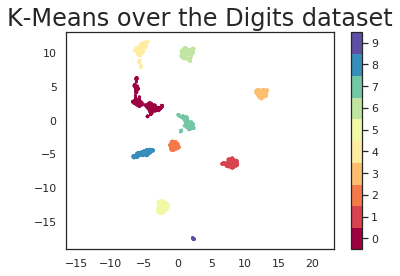

In [58]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Digits dataset', fontsize=24);

K-Means works very well on spherical shaped clusters

### DBSCAN

In [59]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(embedding)

clustering

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

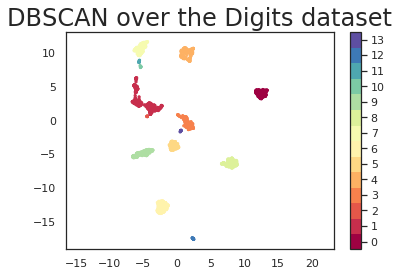

In [62]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clustering.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clustering.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(clustering.labels_))))
plt.title('DBSCAN over the Digits dataset', fontsize=24);

### HDBSCAN

In [63]:
import hdbscan

clusterer = hdbscan.HDBSCAN()

clusterer.fit(embedding)

clusterer

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

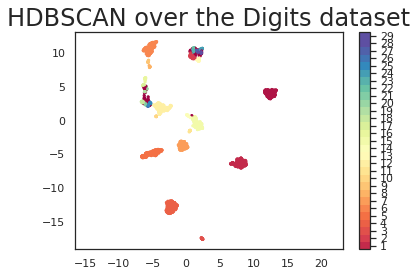

In [65]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clusterer.labels_)))+0.5).set_ticks(np.arange(len(np.unique(clusterer.labels_))))
plt.title('HDBSCAN over the Digits dataset', fontsize=24);

This algorithm is very powerful but very sensitive to hyperparameters

# Homework

Do the same comparison with sklearn moons dataset: K-Means, DBSCAN and HDBSCAN